In [25]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [26]:
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
base_path = "./Data/garbage_classification/"
categories = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 
            'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']

In [27]:
train = tf.keras.utils.image_dataset_from_directory(
    base_path,
    class_names=categories,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=50
)
validate=tf.keras.utils.image_dataset_from_directory(
    base_path,
    class_names=categories,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size=50
)

Found 15515 files belonging to 12 classes.
Using 12412 files for training.
Found 15515 files belonging to 12 classes.
Using 3103 files for validation.


In [28]:
model = tf.keras.models.load_model("Models/Best/75")


In [29]:
class_names = train.class_names

(64, 64, 3)
2/2 [==============================] - 0s 13ms/step
biological
(64, 64, 3)
2/2 [==============================] - 0s 12ms/step
clothes
(64, 64, 3)
2/2 [==============================] - 0s 10ms/step
paper
(64, 64, 3)
2/2 [==============================] - 0s 10ms/step
clothes
(64, 64, 3)
2/2 [==============================] - 0s 12ms/step
battery
(64, 64, 3)
2/2 [==============================] - 0s 13ms/step
biological
(64, 64, 3)
2/2 [==============================] - 0s 11ms/step
shoes
(64, 64, 3)
2/2 [==============================] - 0s 12ms/step
biological
(64, 64, 3)
2/2 [==============================] - 0s 12ms/step
battery


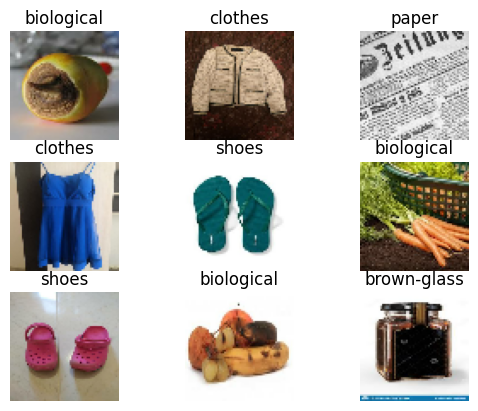

In [34]:
for images, labels in validate.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        print(images[i].numpy().shape)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        print(categories[np.argmax(model.predict(images)[i])])